In [37]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [39]:
##Load the dataset
#df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/temp/diabetes.csv')

#Print the first 5 rows of the dataframe.
#df.head()

url = "https://raw.githubusercontent.com/rrichajalota/Pima-Indians-Diabetes-kaggle/master/diabetes.csv"
path = '/content/drive/My Drive/Colab Notebooks/temp/'
filename = 'diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

df = read_csv(path+filename)
array = df.values
X = array[:,0:8]
y = array[:,8]


In [40]:
# prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = SVC()
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())


0.760457963089542


In [43]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10, random_state=7, shuffle=True)
	cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(cv_results)
	print(msg)

[0.83116883 0.71428571 0.71428571 0.77922078 0.79220779 0.76623377
 0.68831169 0.85714286 0.80263158 0.76315789]
LR: 0.770865 (0.050905)
[0.80519481 0.75324675 0.71428571 0.79220779 0.79220779 0.77922078
 0.66233766 0.80519481 0.82894737 0.73684211]
LDA: 0.766969 (0.047966)
[0.72727273 0.71428571 0.61038961 0.72727273 0.7012987  0.72727273
 0.66233766 0.77922078 0.78947368 0.67105263]
KNN: 0.710988 (0.050792)
[0.72727273 0.66233766 0.63636364 0.71428571 0.67532468 0.67532468
 0.64935065 0.75324675 0.76315789 0.72368421]
CART: 0.698035 (0.041887)
[0.80519481 0.71428571 0.7012987  0.80519481 0.79220779 0.75324675
 0.71428571 0.76623377 0.80263158 0.73684211]
NB: 0.759142 (0.038960)
[0.79220779 0.75324675 0.71428571 0.79220779 0.77922078 0.77922078
 0.68831169 0.75324675 0.80263158 0.75      ]
SVM: 0.760458 (0.034712)


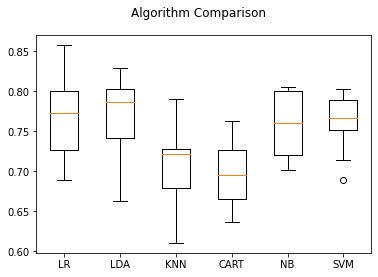

In [44]:
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [31]:
# Bagged Decision Trees for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, y, cv=kfold)

msg = "%f (%f)" % (results.mean(), results.std())
print(results)
print(msg)

[0.76623377 0.75324675 0.74025974 0.77922078 0.80519481 0.79220779
 0.66233766 0.75324675 0.78947368 0.73684211]
0.757826 (0.038555)


In [32]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, y, cv=kfold)

msg = "%f (%f)" % (results.mean(), results.std())
print(results)
print(msg)

[0.79220779 0.80519481 0.71428571 0.77922078 0.79220779 0.80519481
 0.66233766 0.79220779 0.80263158 0.75      ]
0.769549 (0.044944)


In [33]:
# Extra Trees Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier

num_trees = 100
max_features = 7
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, y, cv=kfold)

msg = "%f (%f)" % (results.mean(), results.std())
print(results)
print(msg)

[0.79220779 0.79220779 0.74025974 0.80519481 0.76623377 0.77922078
 0.67532468 0.79220779 0.80263158 0.73684211]
0.768233 (0.038469)


In [34]:
# AdaBoost Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

num_trees = 30
seed=7
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, y, cv=kfold)

msg = "%f (%f)" % (results.mean(), results.std())
print(results)
print(msg)

[0.76623377 0.71428571 0.71428571 0.79220779 0.79220779 0.74025974
 0.68831169 0.77922078 0.80263158 0.76315789]
0.755280 (0.037143)


In [46]:
# XGBoost Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import xgboost as xgb

seed=7
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)

model = xgb.XGBClassifier(objective="binary:logistic", random_state=seed)
results = cross_val_score(model, X, y, cv=kfold)

msg = "%f (%f)" % (results.mean(), results.std())
print(results)
print(msg)

[0.80519481 0.77922078 0.7012987  0.80519481 0.83116883 0.76623377
 0.64935065 0.77922078 0.84210526 0.73684211]
0.769583 (0.056548)


In [35]:
# Stochastic Gradient Boosting Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

seed = 7
num_trees = 100
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, y, cv=kfold)

msg = "%f (%f)" % (results.mean(), results.std())
print(results)
print(msg)

[0.79220779 0.76623377 0.67532468 0.77922078 0.79220779 0.76623377
 0.64935065 0.80519481 0.82894737 0.75      ]
0.760492 (0.053693)


In [47]:
# Voting Ensemble for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold = KFold(n_splits=10, random_state=7, shuffle=True)

# create the sub models
estimators = []
model1 = LogisticRegression(solver='liblinear')
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC(gamma='auto')
estimators.append(('svm', model3))

estimators.append(('LDA', LinearDiscriminantAnalysis()))
estimators.append(('KNN', KNeighborsClassifier()))
estimators.append(('NB', GaussianNB()))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, y, cv=kfold)

msg = "%f (%f)" % (results.mean(), results.std())
print(results)
print(msg)

[0.77922078 0.72727273 0.72727273 0.79220779 0.79220779 0.79220779
 0.63636364 0.80519481 0.84210526 0.75      ]
0.764405 (0.054405)
